In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [254]:
df = pd.read_csv('raw_sales.csv')
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [255]:
df.propertyType.unique()

array(['house', 'unit'], dtype=object)

In [256]:
df.datesold = pd.to_datetime(df.datesold)
df['year'] = df.datesold.dt.year
df['month'] = df.datesold.dt.month
df['day'] = df.datesold.dt.day  

In [257]:
df.drop(columns=['datesold'], inplace=True)

In [258]:
df

,postcode,price,propertyType,bedrooms,year,month,day
0,2607,525000,house,4,2007,2,7
1,2906,290000,house,3,2007,2,27
2,2905,328000,house,3,2007,3,7
3,2905,380000,house,4,2007,3,9
4,2906,310000,house,3,2007,3,21
...,...,...,...,...,...,...,...
29575,2900,500000,unit,3,2019,7,25
29576,2612,560000,unit,2,2019,7,25
29577,2912,464950,unit,2,2019,7,26
29578,2601,589000,unit,2,2019,7,26


In [259]:
df.propertyType = df.propertyType.replace({
    'house' : 1,
    'unit' : 0
})
df['house'] = df[df.propertyType == 1].propertyType
df['unit'] = df[df.propertyType == 0].propertyType
df.replace(0, 1, inplace=True)
df.fillna(0, inplace=True)
df

/tmp/ipykernel_3475/2533333758.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.propertyType = df.propertyType.replace({


,postcode,price,propertyType,bedrooms,year,month,day,house,unit
0,2607,525000,1,4,2007,2,7,1.0,0.0
1,2906,290000,1,3,2007,2,27,1.0,0.0
2,2905,328000,1,3,2007,3,7,1.0,0.0
3,2905,380000,1,4,2007,3,9,1.0,0.0
4,2906,310000,1,3,2007,3,21,1.0,0.0
...,...,...,...,...,...,...,...,...,...
29575,2900,500000,1,3,2019,7,25,0.0,1.0
29576,2612,560000,1,2,2019,7,25,0.0,1.0
29577,2912,464950,1,2,2019,7,26,0.0,1.0
29578,2601,589000,1,2,2019,7,26,0.0,1.0


In [260]:
df.drop(columns=['unit'],inplace=True)

In [261]:
df.drop(columns=['propertyType','day'], inplace=True)
df

,postcode,price,bedrooms,year,month,house
0,2607,525000,4,2007,2,1.0
1,2906,290000,3,2007,2,1.0
2,2905,328000,3,2007,3,1.0
3,2905,380000,4,2007,3,1.0
4,2906,310000,3,2007,3,1.0
...,...,...,...,...,...,...
29575,2900,500000,3,2019,7,0.0
29576,2612,560000,2,2019,7,0.0
29577,2912,464950,2,2019,7,0.0
29578,2601,589000,2,2019,7,0.0


Text(0, 0.5, 'Price')

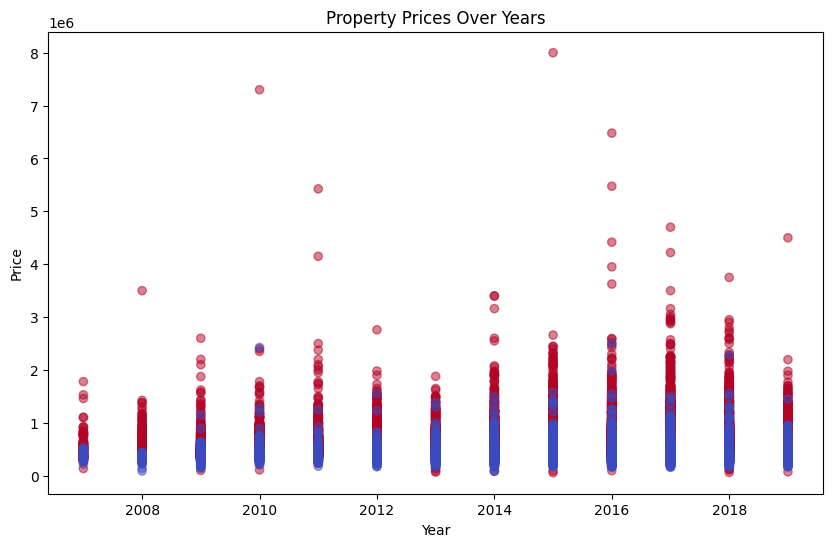

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], c=df['house'], cmap='coolwarm', alpha=0.5)
plt.title('Property Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Price')

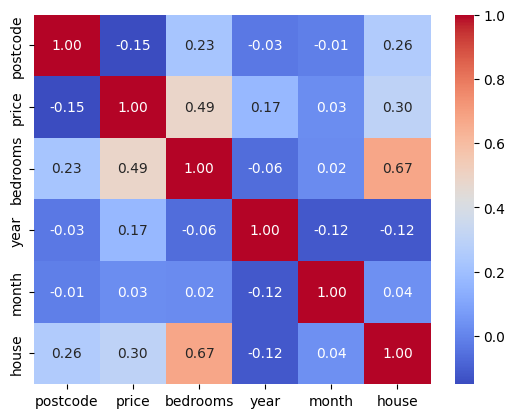

In [263]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [264]:
df.to_csv('processed_sales.csv', index=False)
df = pd.read_csv('processed_sales.csv')

In [265]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

In [266]:
x_train , x_test , y_train , y_test = train_test_split(df[['bedrooms','price']],df.house,train_size=0.2)

In [268]:
model.fit(x_train,y_train)

LogisticRegression()

In [269]:
model.score(x_test,y_test)

0.9464587559161596